# Sta 663 Final Project

by Hao Sheng, Xiaozhou Wang

- netid: `hs220`, `xw106`
- email: `{hao.sheng,xiaozhou.wang}`@duke.edu

Please make sure you have installed our package before runing this ipython notebook!

This project implements the memory sparse version of Viterbi algorithm and Baum-Welch algorithm to hidden Markov Model. 

The whole project is based on the paper ''Implementing EM and Viterbi algorithms for Hidden Markov Model in linear memory'', written by Alexander Churbanov and Stephen Winters-Hilt.

# Loading packages

In [1]:
import numpy as np
from numpy import random
from collections import deque
import matplotlib.pyplot as plt
import HMM
import pandas as pd
from hmmlearn import hmm

# Benchmark of vectorization

In [2]:
pi=np.array([.3,.3,.4])
A=np.array([[.2,.3,.5],[.1,.5,.4],[.6,.1,.3]])
B=np.array([[0.1,0.5,0.4],[0.2,0.4,0.4],[0.3,0.6,0.1]])
states,sequence=HMM.sim_HMM(A,B,pi,100)

In [3]:
%timeit HMM.Baum_Welch(A,B,pi,sequence,1000,0,scale=True)
%timeit HMM.hmm_unoptimized.Baum_Welch(A,B,pi,sequence,1000,0,scale=True)
%timeit HMM.Baum_Welch(A,B,pi,sequence,1000,0,scale=False)
%timeit HMM.hmm_unoptimized.Baum_Welch(A,B,pi,sequence,1000,0,scale=False)

1 loop, best of 3: 2.51 s per loop
1 loop, best of 3: 4.61 s per loop
1 loop, best of 3: 1.14 s per loop
1 loop, best of 3: 2.62 s per loop


As for the optimization, we employed vectorization to avoid the use of triple for-loops under the update section of the Baum-Welch algorithm. We used broadcasting with numpy.newaxis to implement Baum-Welch algorithm much faster. As we can see from Benchmark part in the report, under class HMM we have 2 functions for Baum-Welch algorithm called Baum\_Welch and Baum\_Welch\_fast. In Baum\_Welch\_fast, vectorization is applied when calculating 
$\xi$ while in Baum\_Welch, we use a for loop. Notice in Baum\_Welch, all other parts are implemented with vectorization. This is just an example how vectorization greatly improve the speed. Notice that the run time for vectorized Baum-Welch algorithm is 2.43 s per loop (with scaling) and 1 s per loop (without scaling) compared to 4.01 s per loop (with scaling) and 261 s per loop (without scaling). Other functions are implemented with vectorization as well. Vectorization greatly improves our time performance.

# Simulations

## Effect of chain length

In [4]:
A=np.array([[0.1,0.5,0.4],[0.3,0.5,0.2],[0.7,0.2,0.1]])
B=np.array([[0.1,0.1,0.1,0.7],[0.5,0.5,0,0],[0.7,0.1,0.1,0.1]])
pi=np.array([0.25,0.25,0.5])
A_init=np.array([[0.2,0.6,0.2],[0.25,0.5,0.25],[0.6,0.2,0.2]])
B_init=np.array([[0.05,0.1,0.15,0.7],[0.4,0.4,0.1,0.1],[0.6,0.2,0.2,0.2]])
pi_init=np.array([0.3,0.3,0.4])

In [5]:
lengths=[50,100,200,500,1000]
acc=[]
k=30
for i in lengths:
    mean_acc=0
    for j in range(k):
        states,sequence=HMM.sim_HMM(A,B,pi,i)
        Ahat,Bhat,pihat=HMM.Baum_Welch(A_init,B_init,pi_init,sequence,10,0,True)
        seq_hat=HMM.Viterbi(Ahat,Bhat,pihat,sequence)
        mean_acc=mean_acc+np.mean(seq_hat==states)
    acc.append(mean_acc/k)

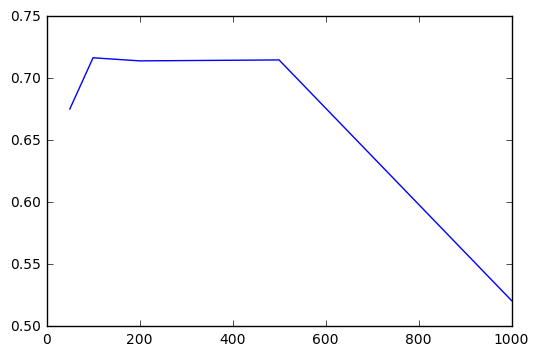

In [6]:
plt.plot(lengths,acc)

From the plot we can see that the length of the chain does have an effect on the performance of Baum-Welch Algorithm and Viterbi decoding. We can see that when the chain is too long, the algorithms tend to have a bad results. 

## Effects of initial values in Baum-Welch Algorithm

In [7]:
A=np.array([[0.1,0.5,0.4],[0.3,0.5,0.2],[0.7,0.2,0.1]])
B=np.array([[0.1,0.1,0.1,0.7],[0.5,0.5,0,0],[0.7,0.1,0.1,0.1]])
pi=np.array([0.25,0.25,0.5])

In [8]:
############INITIAL VALUES 1###############
A_init=np.array([[0.2,0.6,0.2],[0.25,0.5,0.25],[0.6,0.2,0.2]])
B_init=np.array([[0.05,0.1,0.15,0.7],[0.4,0.4,0.1,0.1],[0.6,0.2,0.2,0.2]])
pi_init=np.array([0.3,0.3,0.4])
k=50
acc=np.zeros(k)
for i in range(k):
    states,sequence=HMM.sim_HMM(A,B,pi,500)
    Ahat,Bhat,pihat=HMM.Baum_Welch(A_init,B_init,pi_init,sequence,10,0,False)
    seq_hat=HMM.Viterbi(Ahat,Bhat,pihat,sequence)
    acc[i]=np.mean(seq_hat==states)
print("Accuracy: ",np.mean(acc))

Accuracy:  0.71412


In [9]:
############INITIAL VALUES 2###############
A_init=np.array([[0.5,0.25,0.25],[0.1,0.4,0.5],[0.25,0.1,0.65]])
B_init=np.array([[0.3,0.4,0.2,0.1],[0.1,0.5,0.2,0.2],[0.1,0.1,0.4,0.4]])
pi_init=np.array([0.5,0.2,0.3])
k=50
acc=np.zeros(k)
for i in range(k):
    states,sequence=HMM.sim_HMM(A,B,pi,500)
    Ahat,Bhat,pihat=HMM.Baum_Welch(A_init,B_init,pi_init,sequence,10,0,True)
    seq_hat=HMM.Viterbi(Ahat,Bhat,pihat,sequence)
    acc[i]=np.mean(seq_hat==states)
print("Accuracy: ",np.mean(acc))

Accuracy:  0.28984


In [10]:
############INITIAL VALUES 3###############
A_init=np.array([[0.2,0.6,0.2],[0.25,0.5,0.25],[0.6,0.2,0.2]])
B_init=np.array([[0.3,0.4,0.2,0.1],[0.1,0.5,0.2,0.2],[0.1,0.1,0.4,0.4]])
pi_init=np.array([0.5,0.2,0.3])
k=50
acc=np.zeros(k)
for i in range(k):
    states,sequence=HMM.sim_HMM(A,B,pi,500)
    Ahat,Bhat,pihat=HMM.Baum_Welch(A_init,B_init,pi_init,sequence,10,0,True)
    seq_hat=HMM.Viterbi(Ahat,Bhat,pihat,sequence)
    acc[i]=np.mean(seq_hat==states)
print("Accuracy: ",np.mean(acc))

Accuracy:  0.2442


In [11]:
############INITIAL VALUES 4###############
A_init=np.array([[0.5,0.25,0.25],[0.1,0.4,0.5],[0.25,0.1,0.65]])
B_init=np.array([[0.05,0.1,0.15,0.7],[0.4,0.4,0.1,0.1],[0.6,0.2,0.2,0.2]])
pi_init=np.array([0.5,0.2,0.3])
k=50
acc=np.zeros(k)
for i in range(k):
    states,sequence=HMM.sim_HMM(A,B,pi,500)
    Ahat,Bhat,pihat=HMM.Baum_Welch(A_init,B_init,pi_init,sequence,10,0,True)
    seq_hat=HMM.Viterbi(Ahat,Bhat,pihat,sequence)
    acc[i]=np.mean(seq_hat==states)
print("Accuracy: ",np.mean(acc))

Accuracy:  0.44076


From this part, we can see that the choice of initial values are greatly important. Because Baum-Welch algorithm does not guarantee global maximum, a bad choice of initial values will make Baum-Welch Algorithm to be trapped in a local maximum. Moreover, our experiments show that the initial values for emission matrix $B$ are more important by comparing initial values 3 and 4. The initial parameters represent your belief.

## Effect of number of iteration in Baum-Welch Algorithm

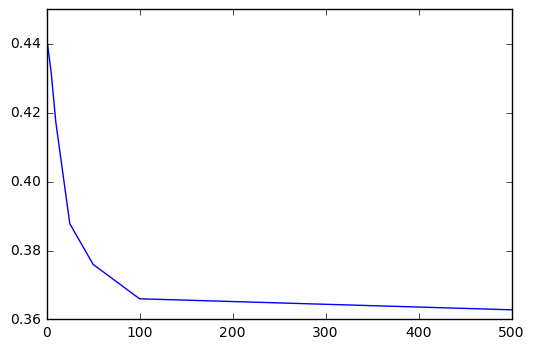

In [12]:
############INITIAL VALUES 1###############
A_init=np.array([[0.2,0.6,0.2],[0.25,0.5,0.25],[0.6,0.2,0.2]])
B_init=np.array([[0.05,0.1,0.15,0.7],[0.4,0.4,0.1,0.1],[0.6,0.2,0.2,0.2]])
pi_init=np.array([0.3,0.3,0.4])
n_iter=[1,5,10,25,50,100,500]
acc=np.zeros([k,len(n_iter)])
k=30
for j in range(k):
    states,sequence=HMM.sim_HMM(A,B,pi,100)
    t=0
    for i in n_iter:
        Ahat,Bhat,pihat=HMM.Baum_Welch(A_init,B_init,pi_init,sequence,i,0,False)
        seq_hat=HMM.Viterbi(Ahat,Bhat,pihat,sequence)
        acc[j,t]=np.mean(seq_hat==states)
        t+=1
plt.plot(n_iter,np.mean(acc,axis=0))

In this initial condition, we can see one feature of Baum-Welch Algorithm: Baum-Welch Algorithm tends to overfit the data, which is $P(Y|\theta_{final})>P(Y|\theta_{true})$. 

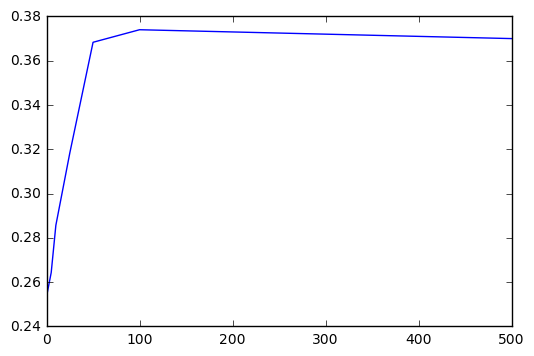

In [13]:
############INITIAL VALUES 2###############
A_init=np.array([[0.5,0.25,0.25],[0.1,0.4,0.5],[0.25,0.1,0.65]])
B_init=np.array([[0.3,0.4,0.2,0.1],[0.1,0.5,0.2,0.2],[0.1,0.1,0.4,0.4]])
pi_init=np.array([0.5,0.2,0.3])
n_iter=[1,5,10,25,50,100,500]
acc=np.zeros([k,len(n_iter)])
k=30
for j in range(k):
    states,sequence=HMM.sim_HMM(A,B,pi,100)
    t=0
    for i in n_iter:
        Ahat,Bhat,pihat=HMM.Baum_Welch(A_init,B_init,pi_init,sequence,i,0,False)
        seq_hat=HMM.Viterbi(Ahat,Bhat,pihat,sequence)
        acc[j,t]=np.mean(seq_hat==states)
        t+=1
plt.plot(n_iter,np.mean(acc,axis=0))

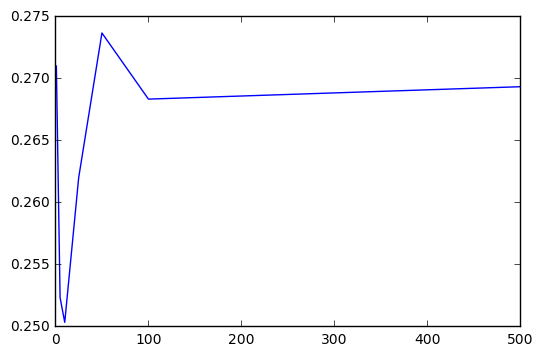

In [14]:
############INITIAL VALUES 3###############
A_init=np.array([[0.2,0.6,0.2],[0.25,0.5,0.25],[0.6,0.2,0.2]])
B_init=np.array([[0.3,0.4,0.2,0.1],[0.1,0.5,0.2,0.2],[0.1,0.1,0.4,0.4]])
pi_init=np.array([0.5,0.2,0.3])
n_iter=[1,5,10,25,50,100,500]
acc=np.zeros([k,len(n_iter)])
k=30
for j in range(k):
    states,sequence=HMM.sim_HMM(A,B,pi,100)
    t=0
    for i in n_iter:
        Ahat,Bhat,pihat=HMM.Baum_Welch(A_init,B_init,pi_init,sequence,i,0,False)
        seq_hat=HMM.Viterbi(Ahat,Bhat,pihat,sequence)
        acc[j,t]=np.mean(seq_hat==states)
        t+=1
plt.plot(n_iter,np.mean(acc,axis=0))

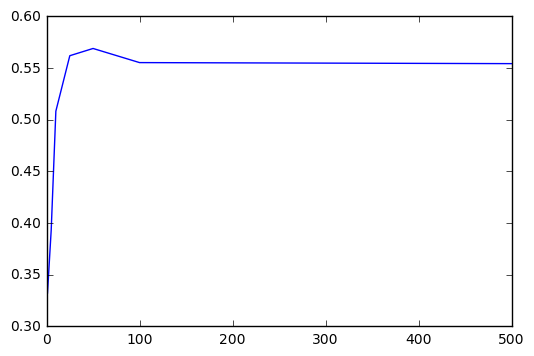

In [15]:
############INITIAL VALUES 4###############
A_init=np.array([[0.5,0.25,0.25],[0.1,0.4,0.5],[0.25,0.1,0.65]])
B_init=np.array([[0.05,0.1,0.15,0.7],[0.4,0.4,0.1,0.1],[0.6,0.2,0.2,0.2]])
pi_init=np.array([0.5,0.2,0.3])
n_iter=[1,5,10,25,50,100,500]
acc=np.zeros([k,len(n_iter)])
k=30
for j in range(k):
    states,sequence=HMM.sim_HMM(A,B,pi,100)
    t=0
    for i in n_iter:
        Ahat,Bhat,pihat=HMM.Baum_Welch(A_init,B_init,pi_init,sequence,i,0,False)
        seq_hat=HMM.Viterbi(Ahat,Bhat,pihat,sequence)
        acc[j,t]=np.mean(seq_hat==states)
        t+=1
plt.plot(n_iter,np.mean(acc,axis=0))

In other situations, increasing the number of iterations in Baum-Welch Algorithm tends to better fit the data.

# Applications

In [16]:
dat=pd.read_csv("data/weather-test2-1000.txt",skiprows=1,header=None)
dat.head(5)

,0,1
0,rainy,yes
1,foggy,no
2,sunny,no
3,sunny,no
4,sunny,no


In [17]:
seq=dat[1].map({"no":0,"yes":1}).tolist()
states=dat[0].map({"sunny":0,"rainy":1,"foggy":2})
initial_A=np.array([[0.7,0.2,0.1],[0.3,0.6,0.1],[0.1,0.6,0.3]])
initial_B=np.array([[0.9,0.1],[0.1,0.9],[0.4,0.6]])
initial_pi=np.array([0.4,0.4,0.2])
Ahat,Bhat,pihat=HMM.Baum_Welch(initial_A,initial_B,initial_pi,seq,max_iter=100,threshold=0,scale=True)
states_hat=HMM.Viterbi(Ahat,Bhat,pihat,seq)
print(np.mean(states_hat==states))

0.634


# Comparative Analysis

In [18]:
A=np.array([[0.1,0.5,0.4],[0.3,0.5,0.2],[0.7,0.2,0.1]])
B=np.array([[0.1,0.1,0.1,0.7],[0.5,0.5,0,0],[0.7,0.1,0.1,0.1]])
pi=np.array([0.25,0.25,0.5])
A_init=np.array([[0.2,0.6,0.2],[0.25,0.5,0.25],[0.6,0.2,0.2]])
B_init=np.array([[0.05,0.1,0.15,0.7],[0.4,0.4,0.1,0.1],[0.6,0.2,0.2,0.2]])
pi_init=np.array([0.3,0.3,0.4])
states,sequence=HMM.sim_HMM(A,B,pi,100)

## Comparing Viterbi decoding

In [19]:
mod=hmm.MultinomialHMM(n_components=3)
mod.startprob_=pi
mod.transmat_=A
mod.emissionprob_=B
res_1=mod.decode(np.array(sequence).reshape([100,1]))[1]

/opt/conda/lib/python3.5/site-packages/hmmlearn/hmm.py:405: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T


In [20]:
res_2=HMM.Viterbi(A,B,pi,sequence)

In [21]:
np.array_equal(res_1,res_2)

True

In [22]:
%timeit -n100 mod.decode(np.array(sequence).reshape([100,1]))
%timeit -n100 HMM.Viterbi(A,B,pi,sequence)

/opt/conda/lib/python3.5/site-packages/hmmlearn/hmm.py:405: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T


100 loops, best of 3: 273 µs per loop
100 loops, best of 3: 1.28 ms per loop


From the above we can see that we coded our Viterbi algorith correctly. But the time complexity is not good enought. When we check the source code of `hmmlearn`, we see that they used C to make things faster. In the future, we might want to use c++ to implement this algorithm and wrap it for python.

## Comparing Baum-Welch Algorithm

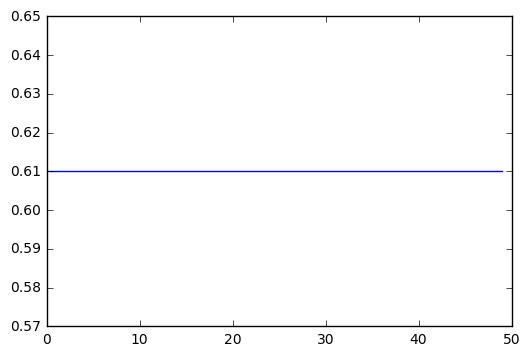

In [23]:
k=50
acc=[]
for i in range(k):
    Ahat,Bhat,pihat=HMM.Baum_Welch(A_init,B_init,pi_init,sequence,max_iter=10,threshold=0,scale=True)
    states_hat=HMM.Viterbi(Ahat,Bhat,pihat,sequence)
    acc.append(np.mean(states_hat==states))
plt.plot(acc)

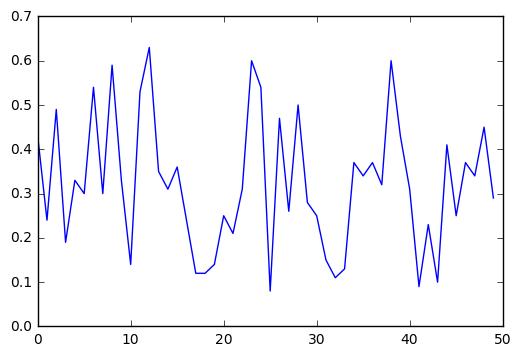

In [24]:
k=50
acc=[]
for i in range(k):
    mod=hmm.MultinomialHMM(n_components=3)
    mod=mod.fit(np.array(sequence).reshape([100,1]))
    pred_states=mod.decode(np.array(sequence).reshape([100,1]))[1]
    acc.append(np.mean(pred_states==states))
plt.plot(acc)

From the above results, we can see that our version gives a stable estimate because we specify initial values for Baum-Welch algorithm. However, the `mod.fit` in `hmmlearn` does not take in any initial values. This makes their function easy to use. However, this action may adversely affect the results. According to the authors of this package, they are modifying their package so that users can input their prior belief.